Supplemental scratch-work for proofs related to Aho's algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import OrderedDict

from example_graphs import make_tree
from utils import nice_tree_plot, nicesubplots
from tree_extraction import Aho

In [2]:
np.random.seed(1)

In [3]:
trees = OrderedDict()
constraints = OrderedDict()

In [4]:
tree_raw = make_tree([3,3])

In [5]:
def convert_tree(tree_raw):
    offset = len(tree_raw.nodes())
    tree = nx.DiGraph()
    indegree = dict(tree_raw.in_degree)
    outdegree = dict(tree_raw.out_degree)
    for n, d in outdegree.items():
        if d > 0:
            n_new = Aho.Internal(n)
            if indegree[n] == 0:
                tree.graph["root"] = n_new
            tree.add_edge(n_new, n)
            for c in tree_raw.successors(n):
                if outdegree[c] > 0:
                    c_new = Aho.Internal(c)
                    tree.add_edge(n_new, c_new)
                else:
                    tree.add_edge(n_new, c)
    return tree

In [6]:
def make_alt_tree():
    tree = nx.DiGraph([
        (0, "()"),
        (0, 1),
        (0, 2),
        (0, 3),
        (1, "(1)"),
        (1, "(1,1)"),
        (1, "(1,2)"),
        (1, "(1,3)"),
        (2, "(2)"),
        (2, "(2,1)"),
        (2, "(2,2)"),
        (2, "(2,3)"),
        (3, "(3)"),
        (3, "(3,1)"),
        (3, "(3,2)"),
        (3, "(3,3)"),
    ], root=0)
    return tree

In [7]:
#tree = convert_tree(tree_raw)
tree = make_alt_tree()

In [8]:
trees["simple"] = tree

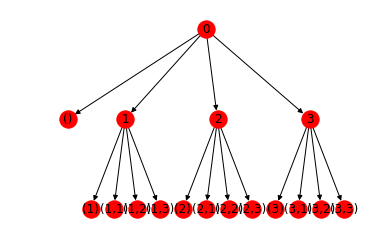

In [9]:
nice_tree_plot(tree)

In [10]:
def get_leaves(g):
    return [node for node, d in g.out_degree if d == 0]

In [11]:
def all_satisfied_triplets(g, leaves_only = True):
    if leaves_only:
        nodes = get_leaves(g)
    else:
        nodes = list(g.nodes())
    pairs_tested = set()
    triplets = []
    for i in nodes:
        for j in nodes:
            if j == i or (j, i) in pairs_tested:
                continue
            pairs_tested.add((i, j))
            for k in nodes:
                if k == i or k == j:
                    continue
                C = tuple(sorted([i, j])) + (k,)
                if Aho.tree_satisfies_constraint(g, C):
                    triplets.append(C)
    return triplets

NHDP-style tree (finite truncation)

In [12]:
def make_nhdp_tree(include_redundant = False):
    if include_redundant:
        t = nx.DiGraph([
            (0, "()"),
            (0, 1),
            (1, 2),
            (1, 4),
            (2, 3),
            (2, 5),
            (3, 6),
            (4, "(1)"),
            (4, 7),
            (5, "(2)"),
            (5, 10),
            (6, "(3)"),
            (6, 13),
            (7, 8),
            (7, 16),
            (8, 9),
            (8, 17),
            (9, 18),
            (10, 11),
            (10, 19),
            (11, 12),
            (11, 20),
            (12, 21),
            (13, 14),
            (13, 22),
            (14, 15),
            (14, 23),
            (15, 24),
            (16, "(1,1)"),
            (17, "(1,2)"),
            (18, "(1,3)"),
            (19, "(2,1)"),
            (20, "(2,2)"),
            (21, "(2,3)"),
            (22, "(3,1)"),
            (23, "(3,2)"),
            (24, "(3,3)"),
        ])
    else:
        t = nx.DiGraph([
            (0, "()"),
            (0, 1),
            (1, 2),
            (1, 4),
            (2, 6),
            (2, 5),
            (4, "(1)"),
            (4, 7),
            (5, "(2)"),
            (5, 10),
            (6, "(3)"),
            (6, 13),
            (7, 8),
            (7, "(1,1)"),
            (8, "(1,2)"),
            (8, "(1,3)"),
            (10, "(2,1)"),
            (10, 11),
            (11, "(2,2)"),
            (11, "(2,3)"),
            (13, "(3,1)"),
            (13, 14),
            (14, "(3,2)"),
            (14, "(3,3)"),
        ])
    t.graph["root"] = 0
    return t

In [13]:
n_tree = make_nhdp_tree()
n_tree_alt = make_nhdp_tree(include_redundant=True)

In [14]:
trees["nhdp"] = n_tree
trees["nhdp_not_pruned"] = n_tree_alt

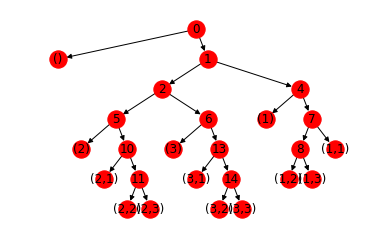

In [15]:
nice_tree_plot(n_tree)

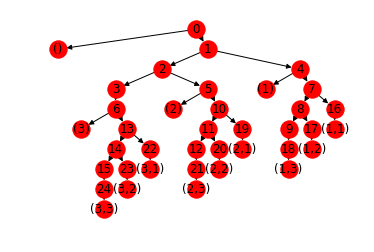

In [16]:
nice_tree_plot(n_tree_alt)

In [17]:
get_leaves(n_tree)

['()',
 '(1)',
 '(2)',
 '(3)',
 '(1,1)',
 '(1,2)',
 '(1,3)',
 '(2,1)',
 '(2,2)',
 '(2,3)',
 '(3,1)',
 '(3,2)',
 '(3,3)']

In [18]:
get_leaves(n_tree_alt)

['()',
 '(1)',
 '(2)',
 '(3)',
 '(1,1)',
 '(1,2)',
 '(1,3)',
 '(2,1)',
 '(2,2)',
 '(2,3)',
 '(3,1)',
 '(3,2)',
 '(3,3)']

In [19]:
unnecessary = sorted([n for n, d in n_tree_alt.out_degree if d == 1])
print("Unnecessary nodes (outdegree = 1) in alt tree: {}".format(unnecessary))

Unnecessary nodes (outdegree = 1) in alt tree: [3, 9, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [20]:
%%time
for name, t in trees.items():
    print("{}".format(name))
    constraints[name] = all_satisfied_triplets(t)

simple
nhdp
nhdp_not_pruned
CPU times: user 7.97 s, sys: 91 ms, total: 8.06 s
Wall time: 8.45 s


In [21]:
for name, C in constraints.items():
    print("{}: {} constraints".format(name, len(C)))

simple: 162 constraints
nhdp: 286 constraints
nhdp_not_pruned: 286 constraints


In [22]:
recovered_trees = OrderedDict()
for name in trees:
    t = trees[name]
    C = constraints[name]
    rt = Aho.build_tree(nodes = get_leaves(t), constraints = C)
    recovered_trees[name] = rt

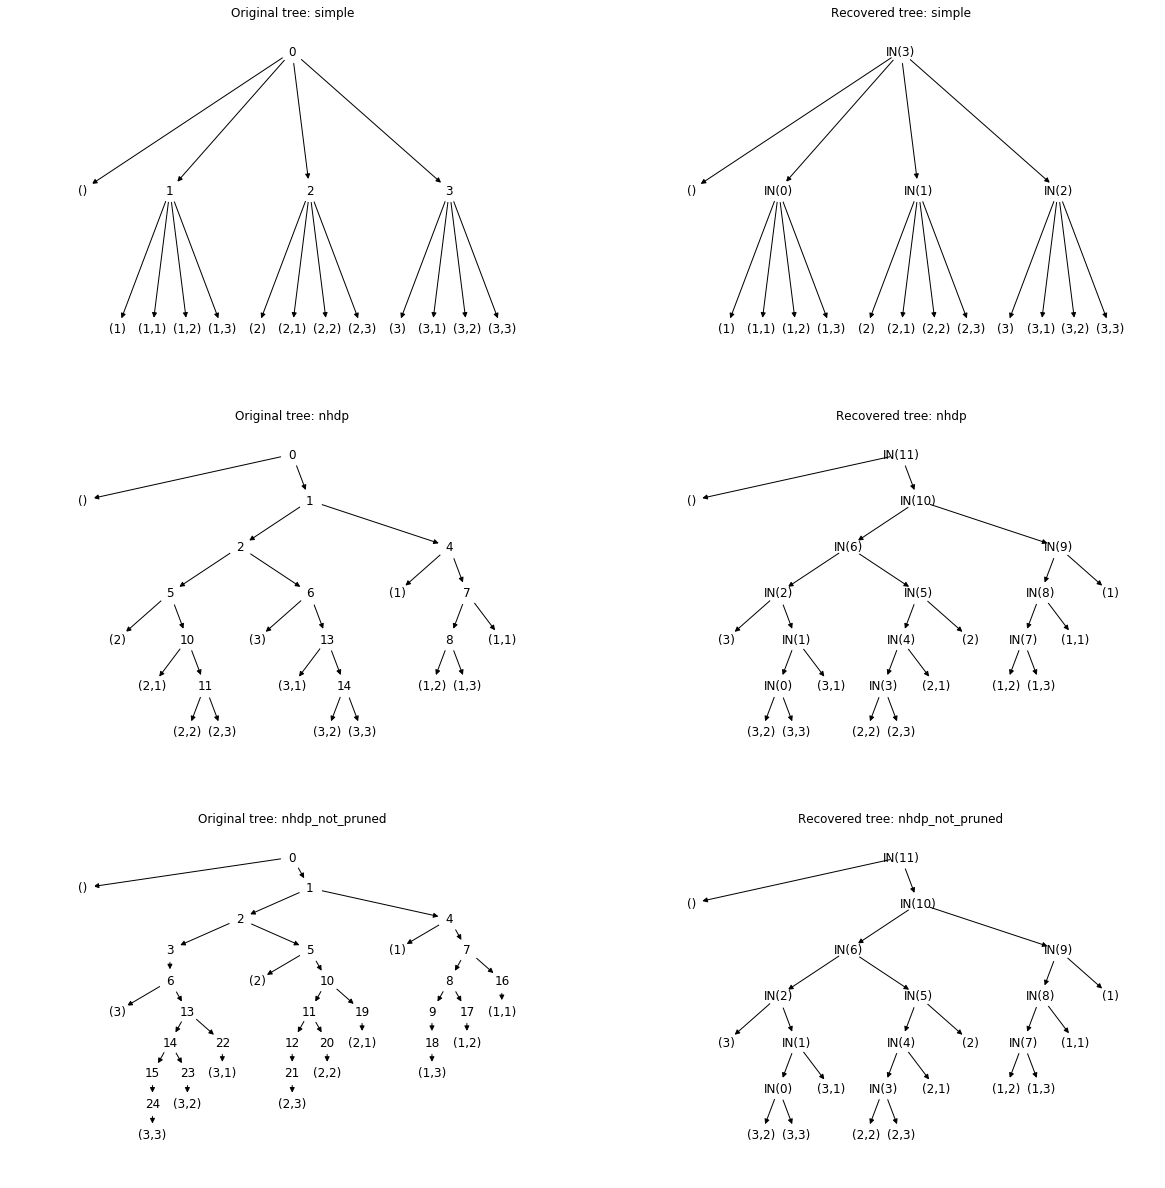

In [23]:
fig, ax = nicesubplots(rows = len(trees), cols = 2, scale=[10,7])
for i, name in enumerate(trees):
    nice_tree_plot(trees[name], ax=ax[i, 0], node_color='w', node_size=500)
    ax[i, 0].set_title("Original tree: {}".format(name))
    nice_tree_plot(recovered_trees[name], ax=ax[i, 1], node_color='w', node_size=500)
    ax[i, 1].set_title("Recovered tree: {}".format(name))

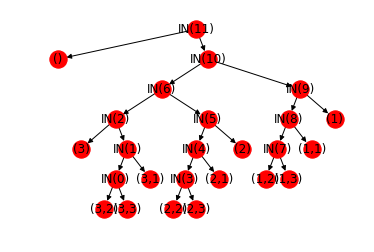

In [24]:
nice_tree_plot(recovered_trees["nhdp"])

In [25]:
import sympy as sp

In [26]:
3 * sp.binomial(4, 2) * 9

162

In [27]:
t = trees["simple"]
expected_simple = []
for p in [1, 2, 3]:
    for i in t.successors(p):
        for j in t.successors(p):
            if j <= i:
                continue
            for k in get_leaves(t):
                if p not in t.predecessors(k):
                    expected_simple.append(tuple(sorted([i, j])) + (k,))

In [28]:
len(expected_simple)

162

In [29]:
expected_simple

[('(1)', '(1,1)', '()'),
 ('(1)', '(1,1)', '(2)'),
 ('(1)', '(1,1)', '(2,1)'),
 ('(1)', '(1,1)', '(2,2)'),
 ('(1)', '(1,1)', '(2,3)'),
 ('(1)', '(1,1)', '(3)'),
 ('(1)', '(1,1)', '(3,1)'),
 ('(1)', '(1,1)', '(3,2)'),
 ('(1)', '(1,1)', '(3,3)'),
 ('(1)', '(1,2)', '()'),
 ('(1)', '(1,2)', '(2)'),
 ('(1)', '(1,2)', '(2,1)'),
 ('(1)', '(1,2)', '(2,2)'),
 ('(1)', '(1,2)', '(2,3)'),
 ('(1)', '(1,2)', '(3)'),
 ('(1)', '(1,2)', '(3,1)'),
 ('(1)', '(1,2)', '(3,2)'),
 ('(1)', '(1,2)', '(3,3)'),
 ('(1)', '(1,3)', '()'),
 ('(1)', '(1,3)', '(2)'),
 ('(1)', '(1,3)', '(2,1)'),
 ('(1)', '(1,3)', '(2,2)'),
 ('(1)', '(1,3)', '(2,3)'),
 ('(1)', '(1,3)', '(3)'),
 ('(1)', '(1,3)', '(3,1)'),
 ('(1)', '(1,3)', '(3,2)'),
 ('(1)', '(1,3)', '(3,3)'),
 ('(1,1)', '(1,2)', '()'),
 ('(1,1)', '(1,2)', '(2)'),
 ('(1,1)', '(1,2)', '(2,1)'),
 ('(1,1)', '(1,2)', '(2,2)'),
 ('(1,1)', '(1,2)', '(2,3)'),
 ('(1,1)', '(1,2)', '(3)'),
 ('(1,1)', '(1,2)', '(3,1)'),
 ('(1,1)', '(1,2)', '(3,2)'),
 ('(1,1)', '(1,2)', '(3,3)'),
 (

In [30]:
def diff_report(a, b):
    a = set(a)
    b = set(b)
    return {
        #"same": set.intersection(a, b),
        "only_a": set.difference(a, b),
        "only_b": set.difference(b, a),
    }

In [31]:
diff_report(expected_simple, constraints["simple"])

{'only_a': set(), 'only_b': set()}

In [32]:
diff_report(constraints["simple"], constraints["nhdp"])

{'only_a': set(),
 'only_b': {('(1)', '(2)', '()'),
  ('(1)', '(2,1)', '()'),
  ('(1)', '(2,2)', '()'),
  ('(1)', '(2,3)', '()'),
  ('(1)', '(3)', '()'),
  ('(1)', '(3,1)', '()'),
  ('(1)', '(3,2)', '()'),
  ('(1)', '(3,3)', '()'),
  ('(1,1)', '(1,2)', '(1)'),
  ('(1,1)', '(1,3)', '(1)'),
  ('(1,1)', '(2)', '()'),
  ('(1,1)', '(2,1)', '()'),
  ('(1,1)', '(2,2)', '()'),
  ('(1,1)', '(2,3)', '()'),
  ('(1,1)', '(3)', '()'),
  ('(1,1)', '(3,1)', '()'),
  ('(1,1)', '(3,2)', '()'),
  ('(1,1)', '(3,3)', '()'),
  ('(1,2)', '(1,3)', '(1)'),
  ('(1,2)', '(1,3)', '(1,1)'),
  ('(1,2)', '(2)', '()'),
  ('(1,2)', '(2,1)', '()'),
  ('(1,2)', '(2,2)', '()'),
  ('(1,2)', '(2,3)', '()'),
  ('(1,2)', '(3)', '()'),
  ('(1,2)', '(3,1)', '()'),
  ('(1,2)', '(3,2)', '()'),
  ('(1,2)', '(3,3)', '()'),
  ('(1,3)', '(2)', '()'),
  ('(1,3)', '(2,1)', '()'),
  ('(1,3)', '(2,2)', '()'),
  ('(1,3)', '(2,3)', '()'),
  ('(1,3)', '(3)', '()'),
  ('(1,3)', '(3,1)', '()'),
  ('(1,3)', '(3,2)', '()'),
  ('(1,3)', '(3,3)

## Tests on entirely non-hierarchical $R$ matrices

Note: when the "true" tree is just a bunch of leaf nodes directly descended from the root,
then
$$p(topic_{d,1} = i, topic_{d,2} = j \,|\, \vec \beta) = p(topic_{d,1} = i \,|\, \vec \beta) \cdot p(topic_{d,2} = j \,|\, \vec \beta)$$
and therefore $C_{i,j} = 1$ for all leaves $i$, $j$

In [33]:
p_node = np.arange(15, 0, -1, dtype='float')
p_node /= p_node.sum()
R_flat = np.outer(p_node, p_node)

In [34]:
p_node

array([0.125     , 0.11666667, 0.10833333, 0.1       , 0.09166667,
       0.08333333, 0.075     , 0.06666667, 0.05833333, 0.05      ,
       0.04166667, 0.03333333, 0.025     , 0.01666667, 0.00833333])

In [35]:
R_flat.sum()

0.9999999999999999

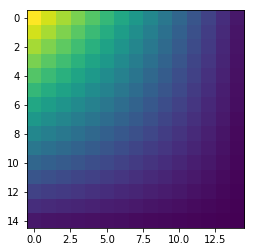

In [36]:
plt.imshow(R_flat);

In [37]:
C_flat = Aho.get_ratio_matrix(R_flat).round(decimals = 12)

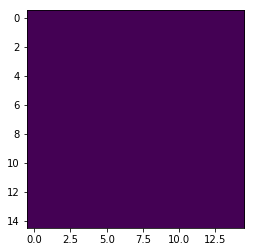

In [38]:
plt.imshow(C_flat);

In [39]:
C_flat.min(), C_flat.max()

(1.0, 1.0)

In [40]:
constraints_flat = Aho.get_constraints(C_flat)
len(constraints_flat)

0

In [41]:
tree_flat = Aho.extract(C_flat)

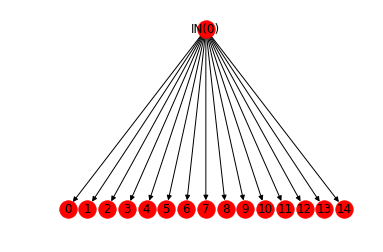

In [42]:
nice_tree_plot(tree_flat)